## 5. Datos y *Overfitting*
### Deep Learning, Introducción práctica con Keras - Segunda parte



### Carga de los datos

In [1]:
!wget --no-check-certificate \
  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
  -O /tmp/cats_and_dogs_small.zip

--2019-08-14 18:32:51--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2019-08-14 18:32:57--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc200d2915200b9b4d54b139174a.dl.dropboxusercontent.com/cd/0/inline/AmqtBFJ2uLwfuOSGx6bax8Dm7d9hWKE21OcbtkFXmsJVSs0yfj1FcHWVGCKrcA6w9bKqQVxZ0T7Qt1eQOTqYOjDQJlMOzPFfRFVMoY6LQNNtYqdA2G8wx3G_AU2SkjQU7eA/file# [following]
--2019-08-14 18:32:57--  https://uc200d2915200b9b4d54b139174a.dl.dropboxusercontent.com/cd/0/inline/AmqtBFJ2uLwfuOSGx6bax8Dm7d9hWKE21OcbtkFXmsJVSs0yfj1FcHWVGCKrcA6w9bKqQVxZ0

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()


In [0]:

base_dir = '/tmp/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])


['cat.722.jpg', 'cat.869.jpg', 'cat.814.jpg', 'cat.935.jpg', 'cat.854.jpg']
['dog.151.jpg', 'dog.160.jpg', 'dog.927.jpg', 'dog.684.jpg', 'dog.886.jpg']
['cat.1338.jpg', 'cat.1088.jpg', 'cat.1190.jpg', 'cat.1037.jpg', 'cat.1435.jpg']
['dog.1489.jpg', 'dog.1226.jpg', 'dog.1171.jpg', 'dog.1473.jpg', 'dog.1014.jpg']
['cat.1745.jpg', 'cat.1613.jpg', 'cat.1639.jpg', 'cat.1654.jpg', 'cat.1717.jpg']
['dog.1933.jpg', 'dog.1668.jpg', 'dog.1989.jpg', 'dog.1621.jpg', 'dog.1545.jpg']


In [5]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


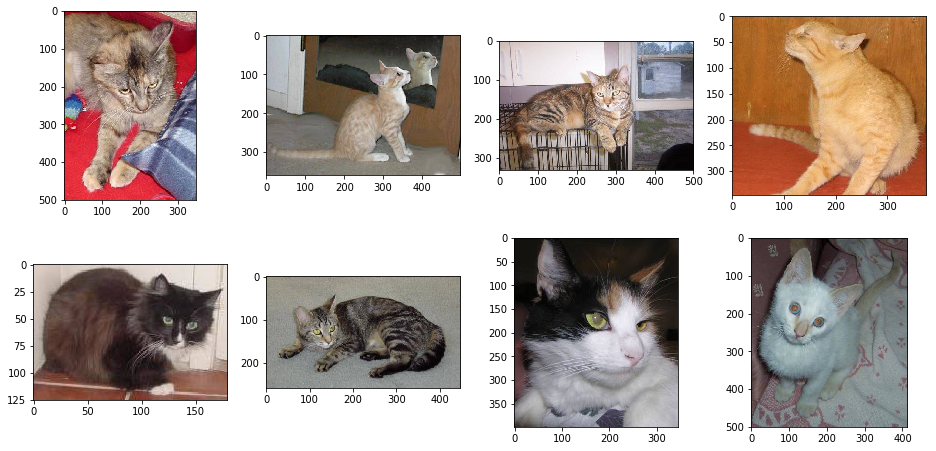

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_cat_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

## Modelo básico

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])




W0814 18:33:07.075382 140296565188480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics = ['acc'])


W0814 18:33:07.473795 140296565188480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)


100
50


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= steps_per_epoch,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps= validation_steps,  
      verbose=2)



Epoch 1/20
100/100 - 14s - loss: 0.6840 - acc: 0.5385 - val_loss: 0.6600 - val_acc: 0.6210
Epoch 2/20
100/100 - 10s - loss: 0.6520 - acc: 0.6170 - val_loss: 0.6307 - val_acc: 0.6400
Epoch 3/20
100/100 - 10s - loss: 0.6127 - acc: 0.6635 - val_loss: 0.6522 - val_acc: 0.6270
Epoch 4/20
100/100 - 10s - loss: 0.5788 - acc: 0.6960 - val_loss: 0.5973 - val_acc: 0.6700
Epoch 5/20
100/100 - 10s - loss: 0.5388 - acc: 0.7265 - val_loss: 0.5835 - val_acc: 0.6910
Epoch 6/20
100/100 - 10s - loss: 0.5143 - acc: 0.7410 - val_loss: 0.5843 - val_acc: 0.6830
Epoch 7/20
100/100 - 10s - loss: 0.4934 - acc: 0.7490 - val_loss: 0.6063 - val_acc: 0.6760
Epoch 8/20
100/100 - 10s - loss: 0.4634 - acc: 0.7720 - val_loss: 0.5625 - val_acc: 0.7120
Epoch 9/20
100/100 - 10s - loss: 0.4409 - acc: 0.7905 - val_loss: 0.5660 - val_acc: 0.7230
Epoch 10/20
100/100 - 10s - loss: 0.4223 - acc: 0.8080 - val_loss: 0.5631 - val_acc: 0.7080
Epoch 11/20
100/100 - 10s - loss: 0.3845 - acc: 0.8240 - val_loss: 0.5458 - val_acc: 0.73

W0814 18:36:30.238656 140296565188480 legend.py:1289] No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

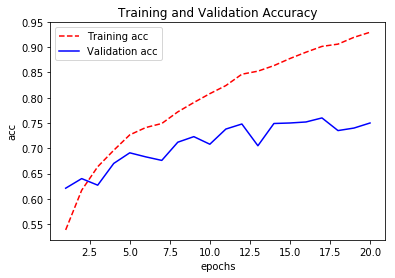

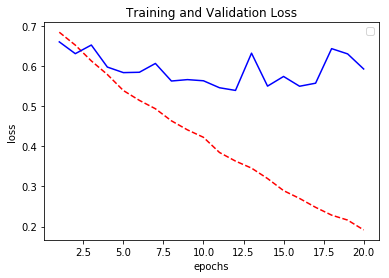

<Figure size 432x288 with 0 Axes>

In [13]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()




In [14]:
test_lost, test_acc= model.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

Test Accuracy: 0.75


In [15]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Using TensorFlow backend.


Saving Wiliams-foto1.jpg to Wiliams-foto1.jpg
[1.]


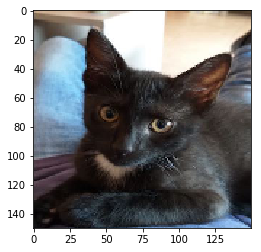

Wiliams-foto1.jpg IS A DOG


In [18]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  plt.imshow(img)  
  plt.show()
  
  if classes[0]>0:
    print( fn + " IS A DOG")
    
  else:
    print( fn + " IS A CAT")


Antes de pasar al siguiente capítulo, ejecutar el siguiente código para terminar el proceso y liberar los recursos.

In [0]:
import os, signal

os.kill( os.getpid() , 
         signal.SIGKILL
       )
